In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("Customer_Data.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [9]:
df.sample(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
316,15667417,Female,54,104000,1
236,15660541,Male,40,57000,0
391,15592570,Male,47,23000,1
99,15756820,Female,28,37000,0
216,15636023,Male,49,65000,0
399,15594041,Female,49,36000,1
181,15774727,Female,31,71000,0
237,15753874,Female,37,80000,0
312,15733964,Female,38,50000,0
1,15810944,Male,35,20000,0


In [10]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

Text(0.5, 1.0, 'Proportion of Gender')

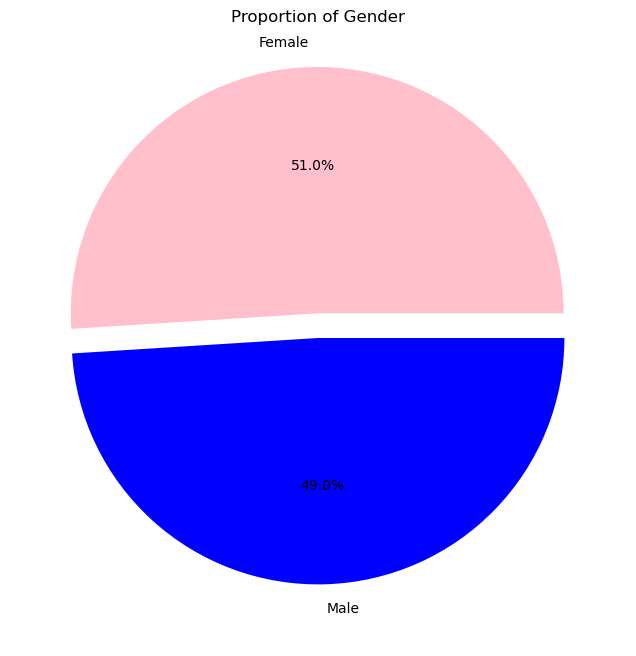

In [11]:
#plotting the proportion of females and males
plt.figure(figsize = (10,8))
plt.pie(df['Gender'].value_counts(), labels = df['Gender'].value_counts().index,autopct="%1.1f%%", explode = (0.1, 0), colors= ['pink', 'blue'])
plt.title("Proportion of Gender")



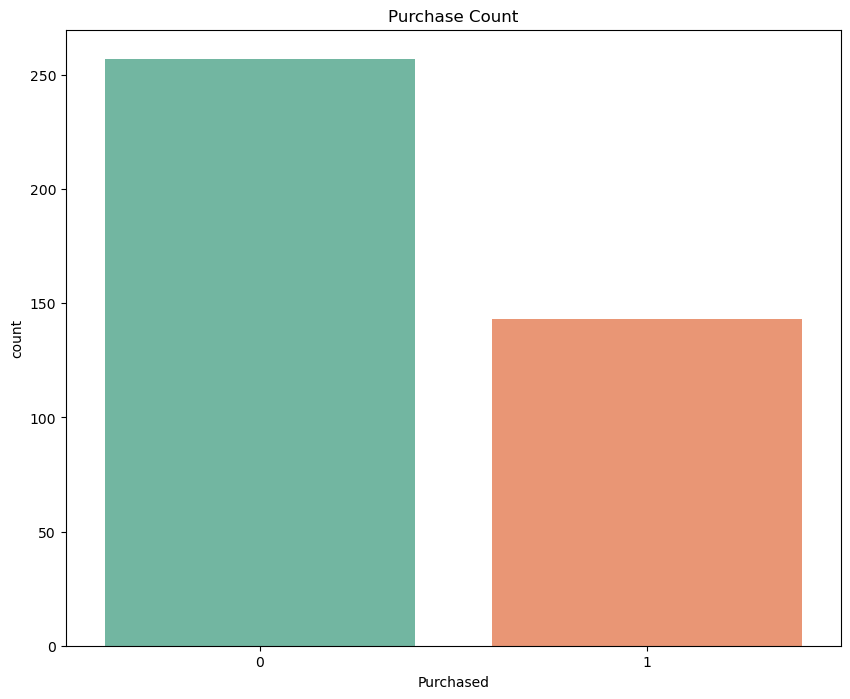

In [23]:
#Count plot for purchased
plt.figure(figsize = (10,8))
sns.countplot(x = 'Purchased', data = df, palette = "Set2")
plt.title("Purchase Count")
plt.show()

Text(0.5, 1.0, 'Age distribution')

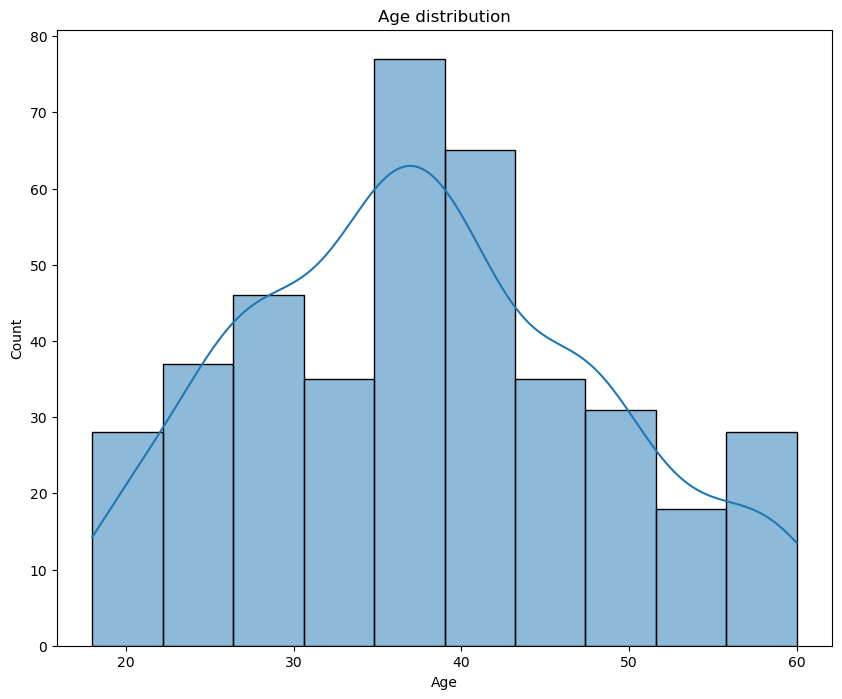

In [25]:
#Histogram and KDE PLOT for age
plt.figure(figsize = (10,8))
sns.histplot(df['Age'], kde =True, palette = "Set2")
plt.title("Age distribution")

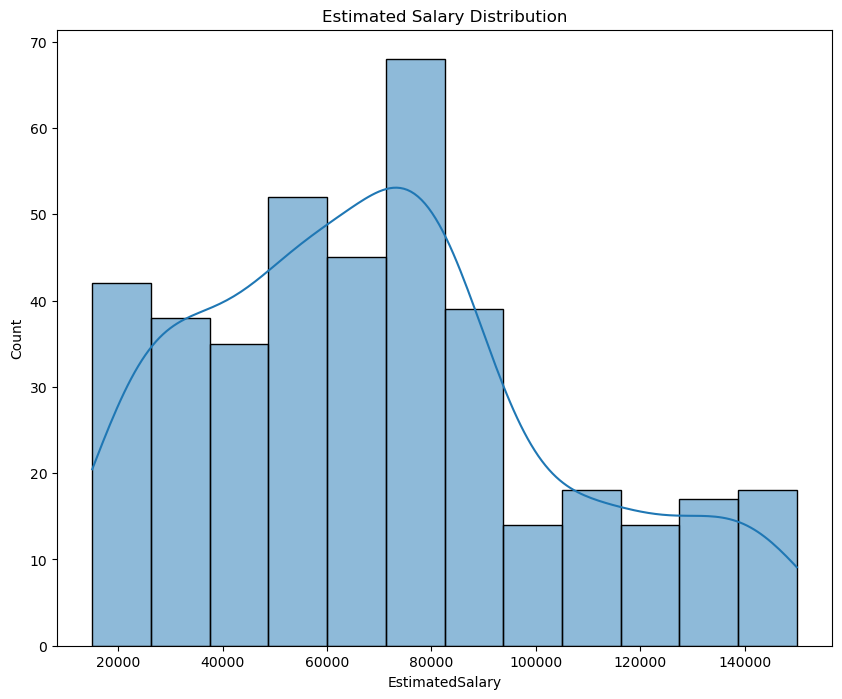

In [26]:
#Histogram for estimated salary
plt.figure(figsize = (10,8))
sns.histplot(data = df, x = df["EstimatedSalary"], kde = True)
plt.title("Estimated Salary Distribution")
plt.show()

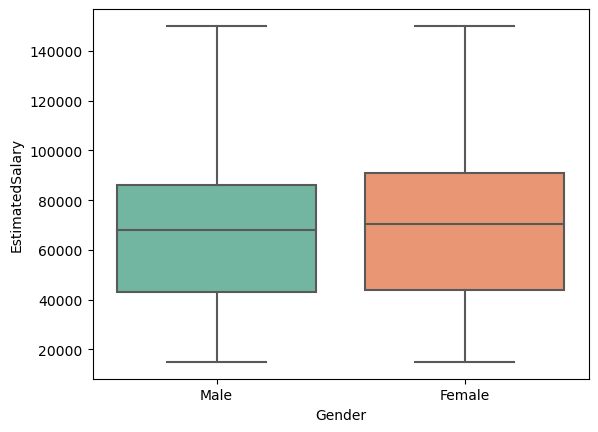

In [28]:
#Estimated salary by gender
sns.boxplot(x = "Gender", y = "EstimatedSalary", data =df, palette = "Set2")
plt.show()

In [29]:
df["Gender_x"] = LabelEncoder().fit_transform(df['Gender'])
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_x
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


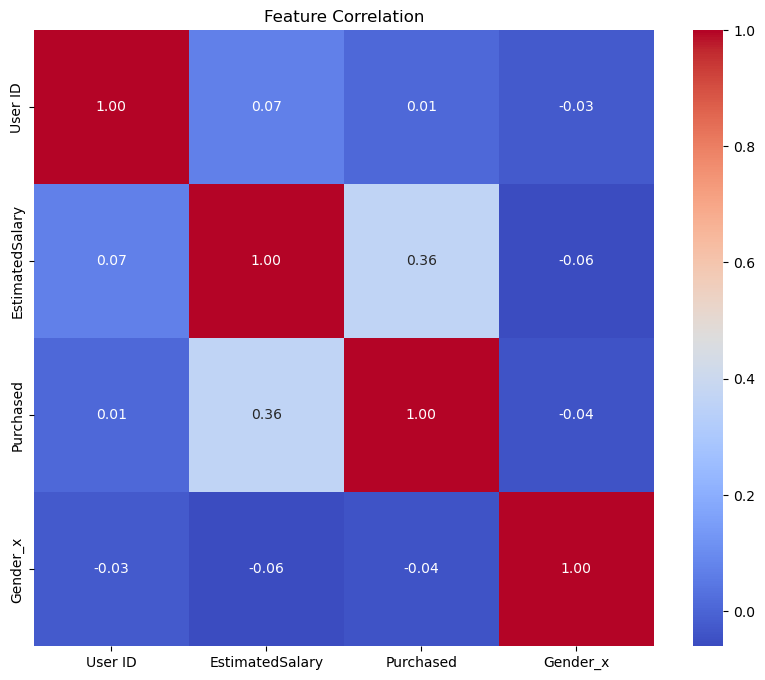

In [33]:
#Heatmap for correlation between numeric valriables
plt.figure(figsize = (10,8))
corr_df = df.drop(['Age', 'Gender'], axis = "columns")
sns.heatmap(corr_df.corr(), annot = True, cmap = 'coolwarm', fmt = ".2f")
plt.title("Feature Correlation")
plt.show()

In [12]:
new_df = df.copy()
new_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
le_gender = LabelEncoder()

In [14]:
new_df['Gender_x'] = le_gender.fit_transform(new_df['Gender'])
new_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_x
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [15]:
x = new_df.drop(['Gender','User ID','Purchased'], axis = "columns")

In [16]:
y = new_df[['Purchased']]

In [17]:
model = RandomForestClassifier()
model

RandomForestClassifier()

In [18]:
x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.7)

In [19]:
y_train.shape

(280, 1)

In [20]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
model.score(x_test, y_test)

0.8833333333333333